In [1]:
import os
import re
import tqdm
import string
import pandas as pd
import numpy as np
import util
from sklearn.decomposition import TruncatedSVD
#from data_preprocessing import *
import word_embedding_load as wel
import baseline_classification as bc
from data_preprocessing import *
import matplotlib.pyplot as plt
import feature_selection_evaluation as fse
import pickle
from testaccuracy import *

/Applications/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
modelName = 'docEmbeddings_win2_load_all.d2v'

Text_INPUT_DIM=200
GENE_INPUT_DIM=25
TEXT_INPUT_DIM=200
PATH = '../model/doc2vec/'

In [3]:
#load a pre-trained text model
text_model = wel.loadTextModel(PATH + modelName)

Successfully loaded the textmodel from ../model/doc2vec/docEmbeddings_win2_load_all.d2v


In [4]:
[all_data, train_size, test_size, train_x, train_y, test_x] = util.loadData()
sentences = data_preprocess(all_data)
svd = TruncatedSVD(n_components=GENE_INPUT_DIM, n_iter=25, random_state=12)
truncated_one_hot_gene = wel.getGeneVec(all_data, svd)
truncated_one_hot_variation = wel.getVariationVec(all_data, svd)
text_train_arrays, text_test_arrays = wel.getTextVec(text_model, train_size, test_size, TEXT_INPUT_DIM)
train_set = np.hstack((truncated_one_hot_gene[:train_size], truncated_one_hot_variation[:train_size], text_train_arrays))
test_set = np.hstack((truncated_one_hot_gene[train_size:], truncated_one_hot_variation[train_size:], text_test_arrays))
encoded_y = pd.get_dummies(train_y)
encoded_y = np.array(encoded_y)

In [5]:
X_train = np.array(train_set)
X_test = np.array(test_set)
y = np.array(bc.getLabels(encoded_y))

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y.shape)

(3689, 250)
(986, 250)
(3689,)


Accuracy: 0.5752 ± 0.0266
NMI: 0.3223 ± 0.0309
Log_loss: 3.7298 ± 0.6190
Normalized confusion matrix
[[ 0.55891239  0.0347432   0.01057402  0.20694864  0.06797583  0.03927492
   0.0694864   0.00453172  0.00755287]
 [ 0.03413655  0.44779116  0.01405622  0.0562249   0.03012048  0.03012048
   0.37148594  0.01004016  0.0060241 ]
 [ 0.03125     0.04166667  0.3125      0.14583333  0.0625      0.03125
   0.36458333  0.01041667  0.        ]
 [ 0.13715047  0.03062583  0.03328895  0.63515313  0.04926764  0.02796272
   0.06924101  0.00665779  0.01065246]
 [ 0.24719101  0.05992509  0.02621723  0.10861423  0.34082397  0.06367041
   0.14606742  0.00374532  0.00374532]
 [ 0.12121212  0.06734007  0.          0.07744108  0.07744108  0.54882155
   0.1010101   0.003367    0.003367  ]
 [ 0.02466793  0.14421252  0.028463    0.03605313  0.02941176  0.0113852
   0.70777989  0.0113852   0.00664137]
 [ 0.0952381   0.23809524  0.          0.04761905  0.          0.
   0.33333333  0.14285714  0.14285714]
 [ 0.04

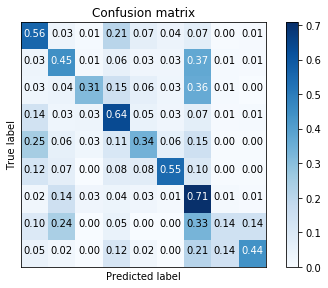

array([[ 0.55891239,  0.0347432 ,  0.01057402,  0.20694864,  0.06797583,
         0.03927492,  0.0694864 ,  0.00453172,  0.00755287],
       [ 0.03413655,  0.44779116,  0.01405622,  0.0562249 ,  0.03012048,
         0.03012048,  0.37148594,  0.01004016,  0.0060241 ],
       [ 0.03125   ,  0.04166667,  0.3125    ,  0.14583333,  0.0625    ,
         0.03125   ,  0.36458333,  0.01041667,  0.        ],
       [ 0.13715047,  0.03062583,  0.03328895,  0.63515313,  0.04926764,
         0.02796272,  0.06924101,  0.00665779,  0.01065246],
       [ 0.24719101,  0.05992509,  0.02621723,  0.10861423,  0.34082397,
         0.06367041,  0.14606742,  0.00374532,  0.00374532],
       [ 0.12121212,  0.06734007,  0.        ,  0.07744108,  0.07744108,
         0.54882155,  0.1010101 ,  0.003367  ,  0.003367  ],
       [ 0.02466793,  0.14421252,  0.028463  ,  0.03605313,  0.02941176,
         0.0113852 ,  0.70777989,  0.0113852 ,  0.00664137],
       [ 0.0952381 ,  0.23809524,  0.        ,  0.04761905,  0

In [11]:
# GBDT
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=3, random_state=0)
bc.getBaseline(X_train, y, clf)

Accuracy: 0.5216 ± 0.0268
NMI: 0.3048 ± 0.0306
Log_loss: 2.9548 ± 0.2877
Normalized confusion matrix
[[ 0.51359517  0.03021148  0.00151057  0.17522659  0.11782477  0.04380665
   0.09214502  0.01963746  0.0060423 ]
 [ 0.06827309  0.40160643  0.01204819  0.05823293  0.0060241   0.
   0.42771084  0.02610442  0.        ]
 [ 0.08333333  0.04166667  0.35416667  0.14583333  0.11458333  0.
   0.26041667  0.          0.        ]
 [ 0.2849534   0.01864181  0.00798935  0.47669774  0.07190413  0.00798935
   0.10652463  0.0159787   0.00932091]
 [ 0.1011236   0.03745318  0.03370787  0.1011236   0.45318352  0.07865169
   0.1835206   0.00374532  0.00749064]
 [ 0.12794613  0.05387205  0.01010101  0.05387205  0.09427609  0.47474747
   0.18518519  0.          0.        ]
 [ 0.0512334   0.18880455  0.0398482   0.0370019   0.00664137  0.00094877
   0.65939279  0.0142315   0.00189753]
 [ 0.04761905  0.0952381   0.          0.          0.          0.
   0.33333333  0.38095238  0.14285714]
 [ 0.09302326  0.  

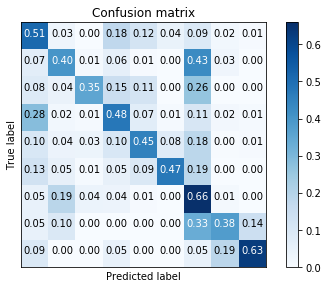

In [14]:
from sklearn.naive_bayes import *
nb = BernoulliNB()
_ = bc.getBaseline(X_train, y, nb)

Accuracy: 0.6568 ± 0.0163
NMI: 0.4409 ± 0.0250
Log_loss: 0.9629 ± 0.0481
Normalized confusion matrix
[[ 0.6570997   0.00755287  0.0060423   0.1918429   0.0755287   0.03625378
   0.02416918  0.          0.00151057]
 [ 0.04417671  0.51405622  0.00401606  0.03212851  0.01807229  0.02208835
   0.36546185  0.          0.        ]
 [ 0.03125     0.03125     0.3125      0.22916667  0.05208333  0.01041667
   0.33333333  0.          0.        ]
 [ 0.17310253  0.01864181  0.01331558  0.71637816  0.03195739  0.01331558
   0.03328895  0.          0.        ]
 [ 0.24719101  0.04868914  0.01872659  0.13108614  0.38951311  0.03370787
   0.13108614  0.          0.        ]
 [ 0.12457912  0.06397306  0.01346801  0.03703704  0.06060606  0.62626263
   0.07407407  0.          0.        ]
 [ 0.01802657  0.12618596  0.0227704   0.01233397  0.02182163  0.0056926
   0.79316888  0.          0.        ]
 [ 0.04761905  0.23809524  0.          0.14285714  0.          0.
   0.28571429  0.14285714  0.14285714]
 [ 0

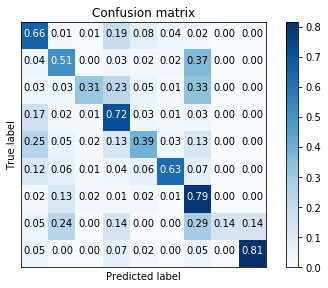

In [25]:
from sklearn import svm
clf = svm.SVC(C = 10, probability=True)
_ = bc.getBaseline(X_train, y, clf)


In [18]:
clf = svm.SVC(probability=True)
clf.fit(X_train, y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
y_pred_proba = clf.predict_proba(X_test)

In [24]:
# submit SVM results for scores
from testaccuracy import *
savesubmisstion(y_pred_proba, test_x, 'svm_temp.csv')
#2.88071    0.81538